# Minibatchkmeans

É um algorítmo do sklearn para clusterização, uma variante do Kmeans, que usa minibatches para reduzir o tempo de computação, sendo estes subconjuntos dos dados de entrada que são amostrados de maneira aleatória a cada iteração do treinamento, convergindo em menos passos para a solução. Ele funciona entre dois passos principais: São sorteadas X amostras entre os conjuntos de dados para formar um minibatch e estes são atribuídos ao centróide mais próximo e; O centróide é atualizado.Essas duas etapas se repetem até que ocorra a convergência ou alcance um número Y de iterações.

Ele possui a seguinte estrutura de parâmetros possíveis : 


class sklearn.cluster.MiniBatchKMeans(n_clusters=8, init=’k-means++’, max_iter=100, batch_size=100, verbose=0, compute_labels=True, random_state=None, tol=0.0, max_no_improvement=10, init_size=None, n_init=3, reassignment_ratio=0.01)

Assim, você pode controlar o número de centróides a serem gerados com o n_clusters, pode controlar o número de iterações para não aguardar a convergência através do max_iter.

Com o init é possível controlar os centros iniciais dos clusters, sendo  o ‘k-means++ responsável por escolher um centro que forneça um caminho rápido para a convergência, mas há ainda o random que rescolhe k observações de maneira randomica nos dados para serem os centróides iniciais. É possível ainda controlar o número de batches através do atributo batch_size. 
















## Importando as bibliotecas

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
%matplotlib inline

## Leitura do dataset 

O dataset utilizado foi o produzido pela equipe a fim de reduzir o tamanho do arquivo, por tanto, considera apenas a câmera de segurança.

In [45]:
dataset_security_camera = pd.read_csv('../security_camera.csv')

## Visualização Rápida

Percebe-se nesse dataset a inclusão de duas colunas, correspondentes à classificação dos botnets gafgyt e mirai

In [46]:
dataset_security_camera.head()

,Unnamed: 0,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,...,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,gafgyt,mirai
0,0,1.000000,98.000000,0.000000,1.000000,98.000000,0.000000,1.000000,98.000000,0.000000,...,0.000000e+00,1.000000,98.0,0.0,98.000000,0.000000e+00,0.0,0.0,1,0
1,1,1.041382,61.510016,55.100457,1.147940,64.897216,162.111476,1.528885,73.145292,326.722394,...,0.000000e+00,1.000000,60.0,0.0,84.852814,0.000000e+00,0.0,0.0,1,0
2,2,1.732176,82.575990,348.212293,1.929229,82.055776,351.662235,2.424873,83.395194,341.682272,...,0.000000e+00,1.992951,98.0,0.0,138.592929,0.000000e+00,0.0,0.0,1,0
3,3,1.050570,97.257558,27.661571,1.231506,95.002707,104.913381,2.196048,90.045689,238.992747,...,0.000000e+00,2.978915,98.0,0.0,138.592929,0.000000e+00,0.0,0.0,1,0
4,4,1.030388,97.978104,0.831573,1.146962,97.615952,14.446324,2.081180,93.867709,139.951226,...,1.358463e-17,3.957881,98.0,0.0,138.592929,3.637979e-12,0.0,0.0,1,0


## Aplicando o Minibatch kmeans

In [88]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters = 2, init='k-means++', max_iter=300, n_init=10, random_state=0, batch_size = 500)
minibatch_kmeans.fit(dataset_security_camera)

minibatch_kmeans.cluster_centers_

array([[ 1.43696733e+04,  4.58667539e+01,  1.20710541e+02,
         1.34290336e+04,  7.03007308e+01,  1.20863547e+02,
         1.43672839e+04,  1.89004713e+02,  1.21964874e+02,
         1.58161390e+04,  1.09889413e+03,  1.25162363e+02,
         1.79112455e+04,  2.06450119e+03,  1.27450768e+02,
         1.90039896e+04,  4.58667539e+01,  1.20710541e+02,
         1.34290336e+04,  7.03007308e+01,  1.20863547e+02,
         1.43672839e+04,  1.89004713e+02,  1.21964874e+02,
         1.58161390e+04,  1.09889413e+03,  1.25162363e+02,
         1.79112455e+04,  2.06450119e+03,  1.27450768e+02,
         1.90039896e+04,  2.79824686e+01,  1.20635350e+02,
         2.73306576e+01,  1.66442138e+02,  2.79892531e+04,
        -1.58181378e+03, -4.13192881e-03,  4.33193750e+01,
         1.20536054e+02,  2.75364054e+01,  1.68034081e+02,
         2.87669991e+04, -1.84891166e+03, -7.45148874e-03,
         1.16942606e+02,  1.20693382e+02,  2.90825320e+01,
         1.68978229e+02,  2.93270471e+04, -2.16134604e+0

In [89]:
minibatch_kmeans.labels_

array([0, 1, 1, ..., 0, 0, 0], dtype=int32)

In [91]:
minibatch_kmeans.score(dataset_security_camera)

-1.2041966487329712e+38

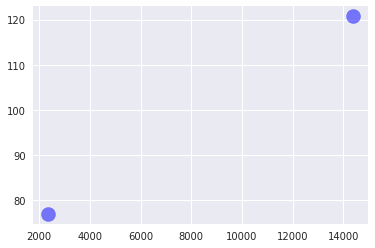

In [64]:
centers = minibatch_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 2], c='blue', s=200, alpha=0.5);

plt.show()